In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Flatten,Dense
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from keras.datasets import mnist
from keras.models import Sequential

In [2]:
(x_train,y_train), (x_test, y_test) = datasets.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(y_train[0])
#Convert the category label into onehot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)
y_train[0]


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
[6]


array([6], dtype=uint8)

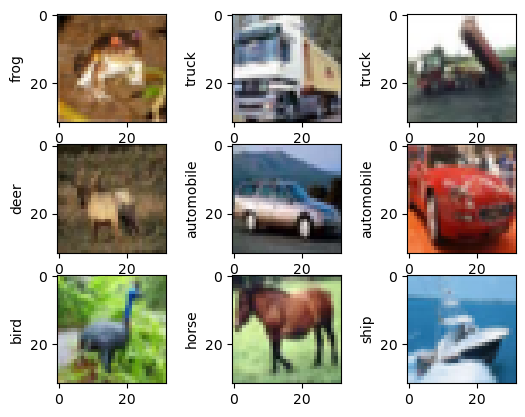

In [3]:
category_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
#Show the first 9 images and their labels
plt.figure()
for i in range(9):
    #create a figure with 9 subplots
    plt.subplot(3,3,i+1)
    #show an image
    plt.imshow(x_train[i])
    #show the label
    plt.ylabel(category_dict[y_train[i][0]])
plt.show()

In [4]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [5]:
def CNN_classification_model(input_size=x_train.shape[1:]):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_size))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=1))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    opt = keras.optimizers.Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
model = CNN_classification_model(input_size=x_train.shape[1:])

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_name = "final_cifar10.h5"
model_checkpoint = ModelCheckpoint(model_name, monitor='loss', verbose=1, save_best_only=True)

trained_weights_path = 'cifar10_weights.h5'
if os.path.exists(trained_weights_path):
    model.load_weights(trained_weights_path, by_name=True)

model.fit(x_train, y_train_onehot, batch_size=32, epochs=10, callbacks=[model_checkpoint], verbose=1)


Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.4614 - accuracy: 0.4717
Epoch 1: loss improved from inf to 1.46137, saving model to final_cifar10.h5
1563/1563 [==============================] - 211s 134ms/step - loss: 1.4614 - accuracy: 0.4717
Epoch 2/10
   1/1563 [..............................] - ETA: 2:51 - loss: 1.2169 - accuracy: 0.5312

E:\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - ETA: 0s - loss: 1.0563 - accuracy: 0.6280
Epoch 2: loss improved from 1.46137 to 1.05626, saving model to final_cifar10.h5
1563/1563 [==============================] - 201s 129ms/step - loss: 1.0563 - accuracy: 0.6280
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 0.8784 - accuracy: 0.6910
Epoch 3: loss improved from 1.05626 to 0.87844, saving model to final_cifar10.h5
1563/1563 [==============================] - 210s 134ms/step - loss: 0.8784 - accuracy: 0.6910
Epoch 4/10
1563/1563 [==============================] - ETA: 0s - loss: 0.7593 - accuracy: 0.7314
Epoch 4: loss improved from 0.87844 to 0.75930, saving model to final_cifar10.h5
1563/1563 [==============================] - 212s 135ms/step - loss: 0.7593 - accuracy: 0.7314
Epoch 5/10
1563/1563 [==============================] - ETA: 0s - loss: 0.6610 - accuracy: 0.7660
Epoch 5: loss improved from 0.75930 to 0.66103, saving model to final_cifar10.h5
1563/1563 

In [7]:
new_model = CNN_classification_model()
new_model.load_weights('final_cifar10.h5')
model.evaluate(x_test, y_test_onehot, verbose=1)          

313/313 [==============================] - 9s 28ms/step - loss: 1.1334 - accuracy: 0.7037


[1.1334130764007568, 0.7037000060081482]

In [8]:
predictions = new_model.predict(x_test[0:4])
pred_classes = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 133ms/step


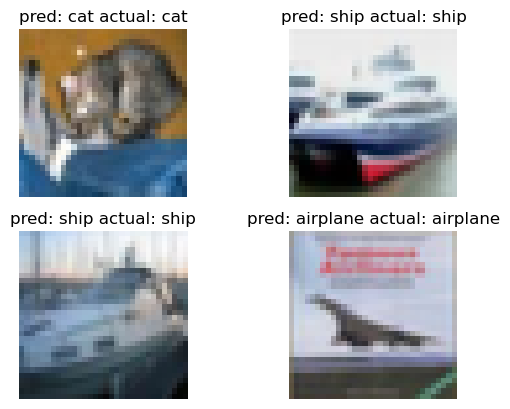

In [9]:
plt.figure()
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(x_test[i])
    plt.title("pred: " + category_dict[pred_classes[i]] + " actual: " + category_dict[y_test[i][0]])
    plt.axis('off')
plt.show()